In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#plt.style.use('ggplot')
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

# **Casos diarios**: Data product 5.

In [20]:
df = pd.read_csv('TotalesNacionales.csv').transpose()
df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
df = df.drop(index=['Fecha'])
df.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df.index]
df.tail(10)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
2021-05-19,3837,1.30063e+06,NaN,27997,35294,720,4778,77680,35294,1.23734e+06,1.19495e+06,1.23658e+06,35294,245644,11462,221,26202,1017,955
2021-05-20,5394,1.30831e+06,NaN,28169,37901,1709,7680,79063,37901,1.24224e+06,1.20108e+06,1.24143e+06,37901,247897,12479,577,26998,1022,795
2021-05-21,5145,1.31591e+06,NaN,28290,40849,1943,7614,80135,40849,1.24677e+06,1.20749e+06,1.24599e+06,40849,249780,13065,526,27746,1032,760
2021-05-22,5104,1.32341e+06,NaN,28386,41261,1873,7514,81437,41261,1.25377e+06,1.21359e+06,1.25297e+06,41261,251615,13170,537,28497,1042,763
2021-05-23,4273,1.32992e+06,NaN,28518,41510,1679,6519,82449,41510,1.25989e+06,1.21895e+06,1.25908e+06,41510,252024,12059,567,29105,1054,623
2021-05-24,3952,1.33526e+06,NaN,28548,40780,1047,5374,82453,40780,1.26593e+06,1.22426e+06,1.26512e+06,40780,252770,11212,375,29705,1061,629
2021-05-25,3219,1.33942e+06,NaN,28585,39243,733,4188,82875,39243,1.27159e+06,1.22796e+06,1.27077e+06,39243,253402,10466,236,30270,1063,594
2021-05-26,4182,1.34462e+06,NaN,28624,38145,748,5176,84170,38145,1.27785e+06,1.23182e+06,1.27702e+06,38145,256081,11728,246,31281,1068,1034
2021-05-27,5769,1.35272e+06,NaN,28809,40510,1852,8117,86122,40510,1.2834e+06,1.23779e+06,1.28256e+06,40510,258401,12548,496,32225,1077,957
2021-05-28,5900,1.36138e+06,NaN,28928,43793,2238,8680,87865,43793,1.28866e+06,1.24459e+06,1.2878e+06,43793,260367,13104,542,33107,1097,908


In [3]:
# Se agrega casos diarios
df['Casos diarios'] = df['Casos totales'].diff(periods=1)

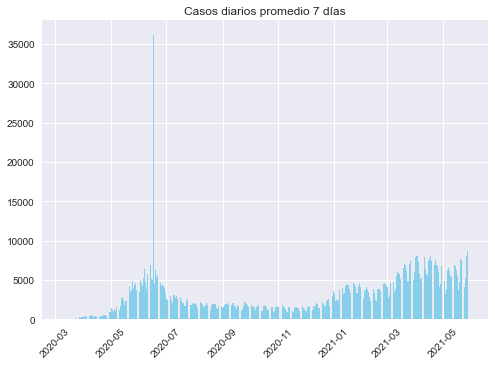

In [4]:
plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

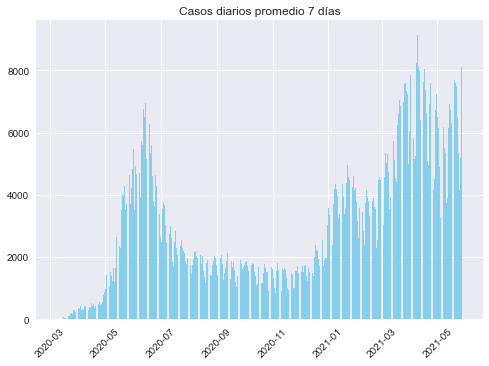

In [6]:
# El '2020-06-17' hay un número muy grande de casos. Parece que ese día agregaron datos que las 
# autoridades no estaban informando. Se decide por eliminar ese día para que la curva quede parecida
# a la curva "oficial".
df = df.drop(index=[datetime.datetime(2020, 6, 17)])

plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

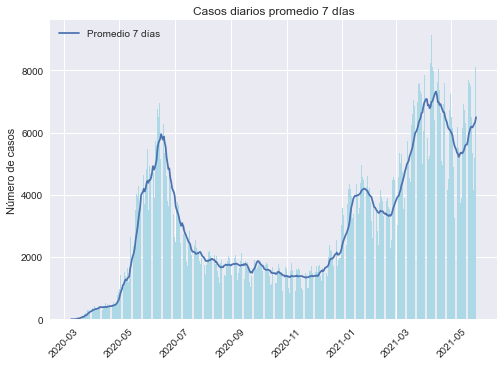

In [10]:
# Se agrega columna promedio 7 días para casos diarios.
n = 7
df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

plt.bar(df.index[7:], df['Casos diarios'][7:], color='lightblue')
plt.plot(df.index[7:], df['Casos diarios promedio 7 días'][7:].values, label='Promedio 7 días')
plt.xticks(rotation=45)
plt.title('Casos diarios promedio 7 días')
plt.ylabel('Número de casos')
plt.legend()
plt.show()

# **Pacientes COVID-19 en UCI por grupo de edad**: Data product 9

In [21]:
edad = pd.read_csv('HospitalizadosUCIEtario_T.csv')
edad.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in edad['Grupo de edad']]
edad.drop(columns=['Grupo de edad'], inplace=True)
edad.tail(10)

,<=39,40-49,50-59,60-69,>=70
2021-05-19,583,615,766,567,359
2021-05-20,599,604,739,562,358
2021-05-21,593,609,731,560,361
2021-05-22,604,613,716,560,376
2021-05-23,604,605,710,554,368
2021-05-24,615,616,713,559,390
2021-05-25,615,616,717,555,388
2021-05-26,622,633,724,559,407
2021-05-27,634,634,720,566,403
2021-05-28,643,630,733,576,409


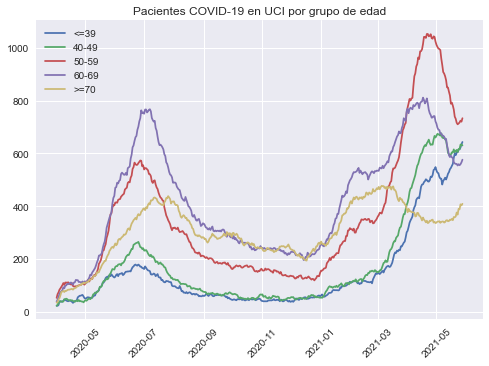

In [12]:
for grupo in edad.columns:
    plt.plot(edad.index, edad[grupo], label=grupo)

plt.title('Pacientes COVID-19 en UCI por grupo de edad')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **DP10 - Fallecidos con COVID-19 por grupo de edad: Descripción**: Data product 10

In [21]:
fallecidos_etario = pd.read_csv('FallecidosEtario_T.csv')
fallecidos_etario.tail(10)

,Grupo de edad,<=39,40-49,50-59,60-69,70-79,80-89,>=90
405,2021-05-19,698,1082,3001,5832,7719,7043,2622
406,2021-05-20,703,1097,3029,5868,7762,7071,2639
407,2021-05-21,707,1107,3049,5896,7787,7095,2649
408,2021-05-22,710,1113,3060,5917,7809,7122,2655
409,2021-05-23,718,1122,3084,5945,7831,7149,2669
410,2021-05-24,719,1127,3086,5950,7838,7157,2671
411,2021-05-25,720,1128,3086,5964,7851,7164,2672
412,2021-05-26,722,1130,3091,5970,7863,7173,2675
413,2021-05-27,724,1142,3111,6003,7915,7215,2699
414,2021-05-28,730,1146,3128,6026,7942,7243,2713


In [22]:
# Poner fechas como index.
fallecidos_etario.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in fallecidos_etario['Grupo de edad']]
fallecidos_etario.drop(columns=['Grupo de edad'], inplace=True)

# "Derivar" para encontrar los casos diarios desde los acumulados.
fallecidos_etario = fallecidos_etario.diff(periods=1)

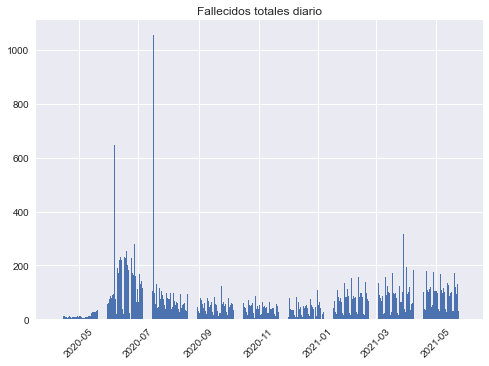

In [23]:
# Número total de fallecidos por día.
plt.bar(fallecidos_etario.sum(axis=1).index, fallecidos_etario.sum(axis=1).values)
plt.title('Fallecidos totales diario')
plt.xticks(rotation=45)
plt.show()

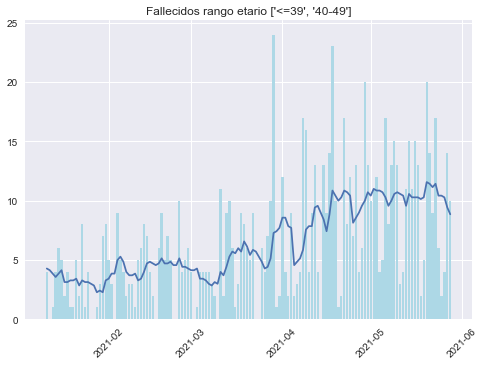

In [27]:
# Rangos: <=39 	40-49 	50-59 	60-69 	70-79 	80-89 	>=90
start_date = datetime.datetime(2021, 1, 4)
rangos = ['<=39', '40-49']

since_start_date = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]
plt.bar(since_start_date.index[7:], since_start_date.sum(axis=1)[7:], label=rango, color='lightblue')
plt.plot(since_start_date.index[7:], since_start_date.sum(axis=1).rolling(window=7).mean()[7:], label=rango)
plt.xticks(rotation=45)
plt.title('Fallecidos rango etario {}'.format(rangos))
plt.show()